# 데이터 탐색 연습
- 전력데이터를 가지고 간단한 분석 실행
- 데이터 시각화 (scatter plot, histogram, heatmap)
- correlation
- outlier detection and removal


### 데이터
- 전력판매량(시도별/용도별) 액셀 파일 https://goo.gl/Cx8Rzw
- 위 자료는 전력거래소에서 받은 자료임

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
!pip install xlrd   # package for excel read (pandas 에도 있음)

데이터 읽기
--

In [11]:
power_data = pd.read_excel('data/시도별_용도별.xls')
print(power_data.shape)

(19, 28)


In [12]:
power_data.head()

구분       주거용      공공용      서비스업     업무용합계     농림어업      광업       제조업  \
0  강원   1940933  1400421   6203749   7604170   607139  398287   6002286   
1  개성         0        0         0         0        0       0         0   
2  경기  16587710  5533662  33434551  38968213  2371347  317263  56603327   
3  경남   4260988  1427560   8667737  10095297  2141813   95989  18053778   
4  경북   3302463  1578115   8487402  10065517  1747462  224568  30115601   

     식료품제조    섬유,의류  ...     기타기계    사무기기     전기기기     영상,음향      자동차  \
0   546621    13027  ...    35063    2019    38062     43986   113448   
1        0        0  ...        0       0        0         0        0   
2  2544420  2109963  ...  3613798  317244  1040171  24519644  2977165   
3   932743   346974  ...  1902913    8070   924235    534196  2156059   
4   566071  3780171  ...   782570   14468   750786   4174971  2356890   

      기타운송    가구및기타    재생재료     산업용합계         합계  
0   108629    12872    3418   7007712   16552816  
1        0        0       0         0          0  
2    67594  1833112  133041  59291937  114847859  
3  2048646   262523   47662  20291580   34647864  
4   123935    60280   77104  32087631   45455611  

[5 rows x 28 columns]

In [13]:
type(power_data), power_data.columns, power_data.index

(pandas.core.frame.DataFrame,
 Index(['구분', '주거용', '공공용', '서비스업', '업무용합계', '농림어업', '광업', '제조업', '식료품제조',
        '섬유,의류', '목재,나무', '펄프,종이', '출판,인쇄', '석유,화확', '의료,광학', '요업', '1차금속',
        '조립금속', '기타기계', '사무기기', '전기기기', '영상,음향', '자동차', '기타운송', '가구및기타', '재생재료',
        '산업용합계', '합계'],
       dtype='object'),
 RangeIndex(start=0, stop=19, step=1))

In [15]:
# power_data.info(), power_data.describe()

In [16]:
power = power_data.set_index('구분'); power.head()

주거용      공공용      서비스업     업무용합계     농림어업      광업       제조업    식료품제조  \
구분                                                                              
강원   1940933  1400421   6203749   7604170   607139  398287   6002286   546621   
개성         0        0         0         0        0       0         0        0   
경기  16587710  5533662  33434551  38968213  2371347  317263  56603327  2544420   
경남   4260988  1427560   8667737  10095297  2141813   95989  18053778   932743   
경북   3302463  1578115   8487402  10065517  1747462  224568  30115601   566071   

      섬유,의류   목재,나무  ...     기타기계    사무기기     전기기기     영상,음향      자동차  \
구분                   ...                                                
강원    13027   19147  ...    35063    2019    38062     43986   113448   
개성        0       0  ...        0       0        0         0        0   
경기  2109963  529274  ...  3613798  317244  1040171  24519644  2977165   
경남   346974   60160  ...  1902913    8070   924235    534196  2156059   
경북  3780171   72680  ...   782570   14468   750786   4174971  2356890   

       기타운송    가구및기타    재생재료     산업용합계         합계  
구분                                                 
강원   108629    12872    3418   7007712   16552816  
개성        0        0       0         0          0  
경기    67594  1833112  133041  59291937  114847859  
경남  2048646   262523   47662  20291580   34647864  
경북   123935    60280   77104  32087631   45455611  

[5 rows x 27 columns]

In [17]:
power = power.drop(['합계', '개성'], errors='ignore')

구분          강원        경기        경남        경북       광주       대구       대전  \
주거용    1940933  16587710   4260988   3302463  1954876  3151904  1872890   
공공용    1400421   5533662   1427560   1578115   565527   826396   954681   
서비스업   6203749  33434551   8667737   8487402  3174973  5470438  3955921   
업무용합계  7604170  38968213  10095297  10065517  3740500  6296834  4910602   
농림어업    607139   2371347   2141813   1747462    74608    69142    28643   

구분          부산        서울      세종       울산       인천       전남       전북       제주  \
주거용    4473510  13131172  384903  1487143  3856852  2284124  2326183   782601   
공공용    1305876   3581534  299675   489865   921748   964024  1096968   301727   
서비스업   7582169  27647345  645424  3649386  7154416  5690659  4910318  2308732   
업무용합계  8888045  31228879  945099  4139251  8076164  6654683  6007286  2610459   
농림어업    107927     15150   69469    80221   142953  3096126  1415004  1364930   

구분          충남       충북  
주거용    2691823  2027281  
공공용    1089613  1267140  
서비스업   7164439  4804638  
업무용합계  8254052  6071778  
농림어업   1928066   721131

데이터 특성 보기
--
- boxplot
- barplot
- histogram

박스플롯
--

한글 폰트 설정 (맥, 윈도우, 리눅스)
--

In [18]:
# 운영 체제마다 한글이 보이게 하는 설정
# 윈도우
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

In [19]:
power.describe()

주거용           공공용          서비스업         업무용합계          농림어업  \
count  1.700000e+01  1.700000e+01  1.700000e+01  1.700000e+01  1.700000e+01   
mean   3.912786e+06  1.388502e+06  8.291312e+06  9.679813e+06  9.400665e+05   
std    4.310227e+06  1.298531e+06  8.708909e+06  9.981623e+06  1.010972e+06   
min    3.849030e+05  2.996750e+05  6.454240e+05  9.450990e+05  1.515000e+04   
25%    1.940933e+06  8.263960e+05  3.955921e+06  4.910602e+06  7.460800e+04   
50%    2.326183e+06  1.089613e+06  5.690659e+06  6.654683e+06  6.071390e+05   
75%    3.856852e+06  1.400421e+06  7.582169e+06  8.888045e+06  1.747462e+06   
max    1.658771e+07  5.533662e+06  3.343455e+07  3.896821e+07  3.096126e+06   

                  광업           제조업         식료품제조         섬유,의류          목재,나무  \
count      17.000000  1.700000e+01  1.700000e+01  1.700000e+01      17.000000   
mean   102720.176471  1.523205e+07  6.636738e+05  6.623886e+05  113237.000000   
std    122502.337918  1.524290e+07  6.333206e+05  9.612365e+05  192034.155445   
min      2898.000000  2.415370e+05  1.102110e+05  3.497000e+03    1324.000000   
25%     14019.000000  2.910768e+06  2.041710e+05  7.589500e+04    6782.000000   
50%     71529.000000  1.236782e+07  5.329430e+05  3.338460e+05   27998.000000   
75%    139856.000000  2.145393e+07  9.327430e+05  7.316510e+05   72680.000000   
max    398287.000000  5.660333e+07  2.544420e+06  3.780171e+06  639429.000000   

       ...          기타기계           사무기기          전기기기         영상,음향  \
count  ...  1.700000e+01      17.000000  1.700000e+01  1.700000e+01   
mean   ...  6.199825e+05   28781.235294  3.412887e+05  2.805870e+06   
std    ...  9.142491e+05   75569.163261  3.788489e+05  6.246070e+06   
min    ...  1.167000e+03       0.000000  7.710000e+02  0.000000e+00   
25%    ...  7.797000e+04    4395.000000  8.360900e+04  4.622500e+04   
50%    ...  1.988470e+05    7240.000000  1.785020e+05  4.200050e+05   
75%    ...  7.825700e+05   14319.000000  4.289060e+05  1.124564e+06   
max    ...  3.613798e+06  317244.000000  1.125141e+06  2.451964e+07   

                자동차          기타운송         가구및기타           재생재료         산업용합계  \
count  1.700000e+01  1.700000e+01  1.700000e+01      17.000000  1.700000e+01   
mean   1.053153e+06  2.600299e+05  2.005222e+05   33137.000000  1.627484e+07   
std    1.031256e+06  5.260199e+05  4.450945e+05   38105.462924  1.598920e+07   
min    7.730000e+02  0.000000e+00  1.743000e+03     743.000000  1.588755e+06   
25%    1.134480e+05  1.765600e+04  1.339200e+04    2875.000000  2.988274e+06   
50%    6.128980e+05  6.812700e+04  4.181400e+04   19725.000000  1.258230e+07   
75%    2.156059e+06  1.239350e+05  1.327070e+05   46038.000000  2.462327e+07   
max    2.977165e+06  2.048646e+06  1.833112e+06  133041.000000  5.929194e+07   

                 합계  
count  1.700000e+01  
mean   2.986743e+07  
std    2.618055e+07  
min    2.918758e+06  
25%    1.538637e+07  
50%    2.451531e+07  
75%    3.464786e+07  
max    1.148479e+08  

[8 rows x 27 columns]

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 26 Text xticklabel objects>)

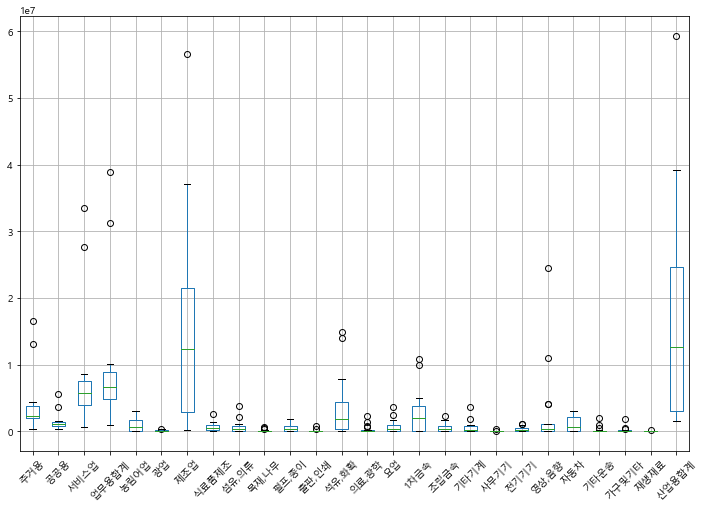

In [20]:
power.drop('합계', axis=1).boxplot(figsize=(12,8))
plt.xticks(rotation=45)

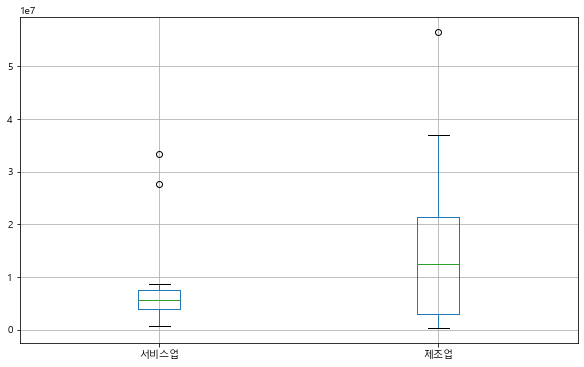

In [43]:
power[['서비스업','제조업']].boxplot(figsize=(10,6))

바 플롯 (수평형)
--

In [21]:
power = power.drop('합계', axis=1)

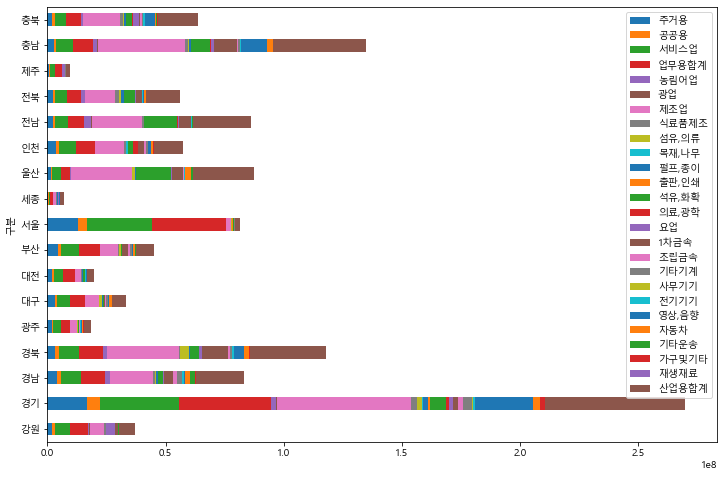

In [22]:
power.plot(kind='barh', figsize=(12,8), stacked=True)

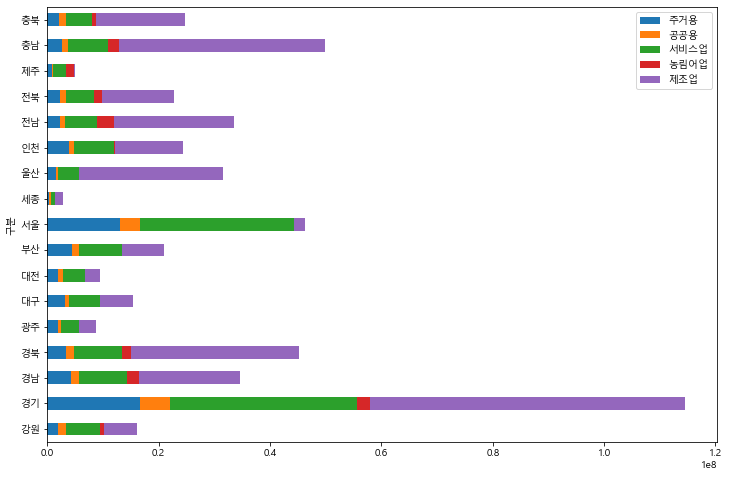

In [23]:
sample = ['주거용', '공공용', '서비스업', '농림어업', '제조업']
power[sample].plot(kind='barh', figsize=(12,8), stacked=True)

## correlation 보기 (나중에 나오는 내용이지만 살짝...)

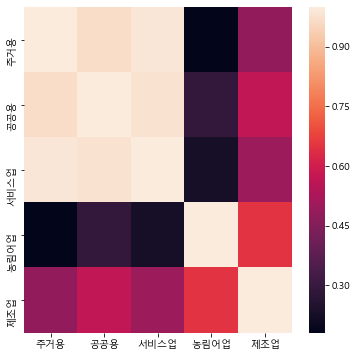

In [24]:
import seaborn as sns
sample = ['주거용', '공공용', '서비스업', '농림어업', '제조업']
power2 = power[sample]
corr = power2.corr().round(2)
plt.figure(figsize=(6,6))
sns.heatmap(corr)

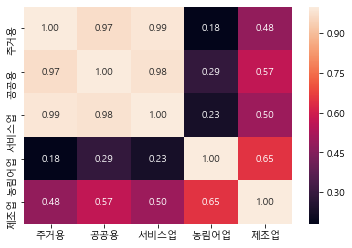

In [25]:
sns.heatmap(corr.values, cbar=True, annot =True,
            fmt='.2f', annot_kws={'size': 10},
           yticklabels=corr, xticklabels=corr)

## Back to the text ...

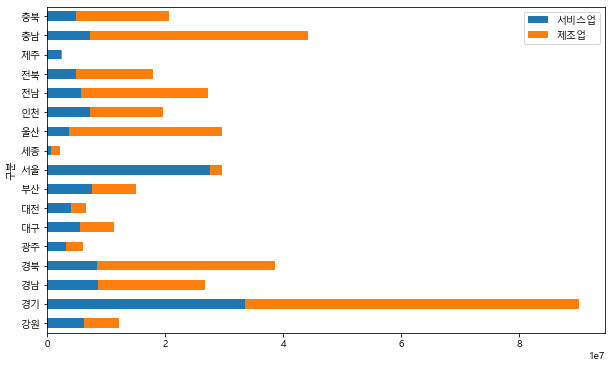

In [26]:
see2 = [ '서비스업','제조업']
power[see2].plot(kind='barh', figsize=(10,6), stacked=True)

In [27]:
power = power[['서비스업', '제조업']]
power.T

구분         강원        경기        경남        경북       광주       대구       대전  \
서비스업  6203749  33434551   8667737   8487402  3174973  5470438  3955921   
제조업   6002286  56603327  18053778  30115601  2910768  5862633  2608343   

구분         부산        서울       세종        울산        인천        전남        전북  \
서비스업  7582169  27647345   645424   3649386   7154416   5690659   4910318   
제조업   7512588   1918893  1502922  25883132  12367816  21453926  12965875   

구분         제주        충남        충북  
서비스업  2308732   7164439   4804638  
제조업    241537  37057955  15883448

히스토그램
--

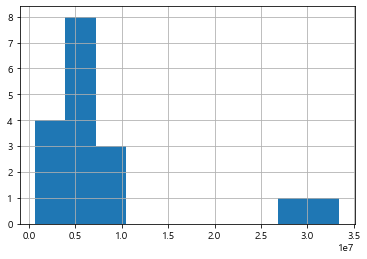

In [28]:
power['서비스업'].hist()

스캐터 플롯
--

In [29]:
# print(power.shape)
# n_samples = power.shape[0]
# n_samples

Text(0, 0.5, '제조업')

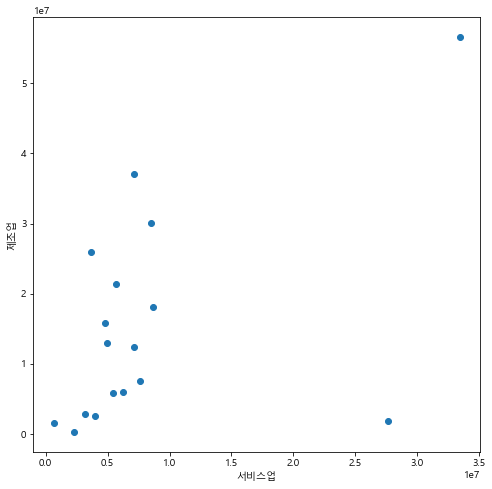

In [30]:
plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'], power['제조업'])
plt.xlabel('서비스업')
plt.ylabel('제조업')

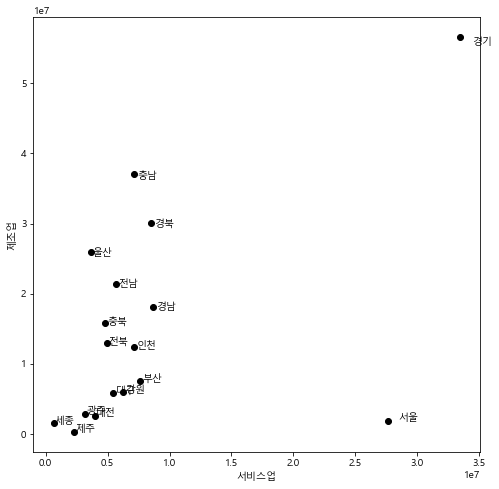

In [31]:
plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'], power['제조업'],c='k',marker='o')
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])

In [32]:
power = power.drop(['경기', '서울'])
power

서비스업       제조업
구분                   
강원  6203749   6002286
경남  8667737  18053778
경북  8487402  30115601
광주  3174973   2910768
대구  5470438   5862633
대전  3955921   2608343
부산  7582169   7512588
세종   645424   1502922
울산  3649386  25883132
인천  7154416  12367816
전남  5690659  21453926
전북  4910318  12965875
제주  2308732    241537
충남  7164439  37057955
충북  4804638  15883448

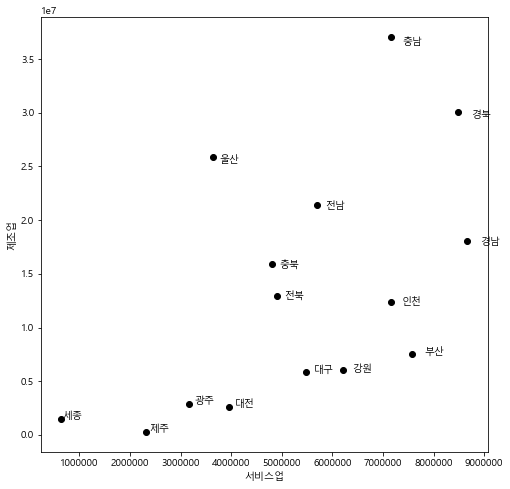

In [33]:
plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'], power['제조업'],c='k',marker='o')
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])

# For Professor Hwang In-Kyu in Chung-nam University

In [15]:
df = pd.read_excel('./data/data_from_chungnam.xlsx')
df.tail()

Gene #1 Gene #2-1 Gene #3
224     NaN      ETV6     NaN
225     NaN     ARID2     NaN
226     NaN     GMEB1     NaN
227     NaN    ZBTB33     NaN
228     NaN     ZNF83     NaN

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 3 columns):
Gene #1      174 non-null object
Gene #2-1    229 non-null object
Gene #3      162 non-null object
dtypes: object(3)
memory usage: 5.5+ KB


In [14]:
df.describe()

Gene #1 Gene #2-1 Gene #3
count      174       229     162
unique     174       229     162
top     ZBTB11      ETV6  ZBTB11
freq         1         1       1

In [16]:
df.columns=['A','B','C']; df

A       B       C
0    PRDM10   CREB1     SP1
1    ZNF629  PRDM10  PRDM10
2      SIX5  ZNF629  ZNF629
3    ZNF692    TFE3   IKZF1
4    ZNF174    SIX5  ZNF692
..      ...     ...     ...
224     NaN    ETV6     NaN
225     NaN   ARID2     NaN
226     NaN   GMEB1     NaN
227     NaN  ZBTB33     NaN
228     NaN   ZNF83     NaN

[229 rows x 3 columns]

In [18]:
df['A'].value_counts().max()

1

In [19]:
df['B'].value_counts().max()

1

In [20]:
df['C'].value_counts().max()

1

In [25]:
df.A.sort_values()[:10]

120    ARID4B
172      ATF1
157      ATF7
5       BACH1
50     BCL11A
110    BCL11B
109     CBLL2
100      CBX1
108     CEBPB
137      CHD2
Name: A, dtype: object

In [32]:
print(len(df.A.sort_values().unique()))
df.A.sort_values().unique()

175


array(['ARID4B', 'ATF1', 'ATF7', 'BACH1', 'BCL11A', 'BCL11B', 'CBLL2',
       'CBX1', 'CEBPB', 'CHD2', 'CREB1', 'CREM', 'CTBP1', 'EHMT2', 'ELF1',
       'ELK1', 'EP400', 'ETS1', 'GABPA', 'GABPB1', 'GATAD1', 'GFI1B',
       'GLIS1', 'HCFC1', 'HDAC1', 'HLTF', 'IKZF1', 'INSM2', 'IRF2',
       'KAT8', 'KDM1A', 'KLF1', 'KLF13', 'KLF16', 'KLF7', 'KLF8', 'KLF9',
       'KMT2B', 'L3MBTL2', 'MAX', 'MBD1', 'MCM2', 'MGA', 'MIER1', 'MLLT1',
       'MTA2', 'MTA3', 'MXD4', 'MXI1', 'MYC', 'MYNN', 'MZF1', 'NBN',
       'NKRF', 'NR2C1', 'NR2C2', 'NRF1', 'PATZ1', 'POLR2A', 'PRDM1',
       'PRDM10', 'PRDM4', 'RBAK', 'RBPJ', 'RELA', 'REST', 'SAP130',
       'SCRT2', 'SIN3A', 'SIX5', 'SKIL', 'SMARCA4', 'SP2', 'SP3', 'SP7',
       'STAT5A', 'SUZ12', 'TFDP1', 'THAP11', 'WT1', 'YY1', 'YY2',
       'ZBTB10', 'ZBTB11', 'ZBTB12', 'ZBTB17', 'ZBTB20', 'ZBTB21',
       'ZBTB26', 'ZBTB40', 'ZBTB48', 'ZBTB6', 'ZBTB7A', 'ZBTB8A', 'ZEB1',
       'ZEB2', 'ZFP3', 'ZFP37', 'ZFP69B', 'ZGPAT', 'ZNF10', 'ZNF133',
       'ZNF

In [28]:
df.shape

(229, 3)

In [30]:
df.A.dropna().shape

(174,)